See the parent `Kolumbo_volcano.ipynb` notebook.

#### Notebook config

##### Loading modules

In [33]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot']) #, 'ggplot', 'kmc_test']) # 'dark_background'
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [34]:
from arrau import *
import pandas as pd
from fullwavepy.seismic.plots import plot_mod

##### Paths


In [3]:
path_fig = '../../figures/ch_kol/'

##### Plot config

In [35]:
plt.style.use(['default', 'seaborn-dark']) #, 'dark_background'])
import matplotlib
font = {'family' : 'sans-serif', # serif
        'weight' : 'normal', # bold
        'size'   : 12}
matplotlib.rc('font', **font)

##### Loading projects


In [36]:
# Box 
# in seconds
dt = 0.0025  
ns = 2000
# in metres
dx = 50      
x1 = +8.0e3     
x2 = +2.5e4    
y1 = -3.0e3    
y2 = +1.5e4    
z1 = 0 
z2 = +4.0e3    
box = [x1, x2, y1, y2, z1, z2]
# bigger_box = box
geom_bigger = dict(dt=dt, ns=ns, dx=dx, box=box)

In [38]:
# p14 = ProjInv('p14', path='/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/', 
# box=b01.box,ns=2e3)
lll(40)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path, **geom_bigger) # Lasso selected.

Content of  /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt : 
 cat: /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14/p14-Info.txt: No such file or directory



##### Loading PROTEUS


In [39]:
xp = PROTEUS()

## Zoom-in box

In [40]:
from fullwavepy.utils import Box
x1 = 0.8e4
x2 = 1.8e4
y1 = 0.4e4
y2 = 1.4e4
z1 = 0.0e4
z2 = 0.4e4
box_zoom = Box(x1,x2,y1,y2,z1,z2)

In [41]:
from fullwavepy.utils import Box
x1 = 1.1e4
x2 = 1.5e4
y1 = 0.7e4
y2 = 1.1e4
z1 = 0.0e4
z2 = 0.4e4
box_zoom2 = Box(x1,x2,y1,y2,z1,z2)

## Bathymetry

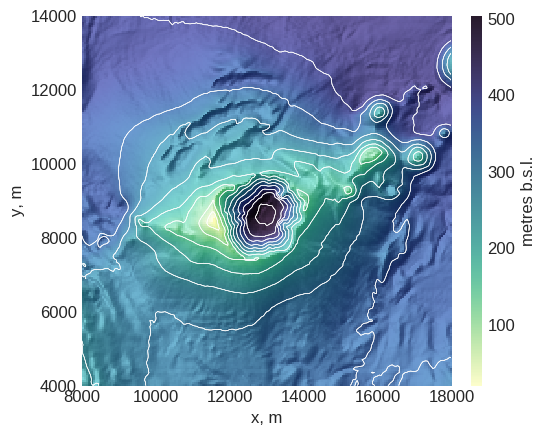

In [42]:
# code 
# fname = '../ch03_PROTEUS_exp/data/bathy_x-8e4_8e4_y_-4e4_4e4_res50_3201x1601.mmp'
# arr = np.memmap(fname, dtype=np.float32, shape=(3201,1601))
# bt_zoom = Surf(arr, extent=[[-8e4,8e4],[-4e4,4e4]]).extract(box_zoom.extent[:-1])
bt_zoom = xp.read_bathy_topo().extract(box_zoom.extent[:-1])
bt_zoom.plot(mode='shade', cmap='cmo.deep', label='metres b.s.l.')
bt_zoom.plot(mode='cr', colors='w')

## Reference Vp

### Reference 1
Starting model.

In [43]:
svp = p14.o.vp.it[0].read()
svp = Arr3d(svp, extent=svp.extent)
svp = svp.extract(box_zoom.extent)
ref = svp
# ref.plot(13e3, 9e3, 2.5e3, cmap='twilight')

## Model evolution

### Export to mmp

In [10]:
from arrau.api.io import *
from fullwavepy.ioapi.memmap import save_mmp

In [11]:
for it in np.arange(10,161,10):
    f = p14.o.vp.it[it]
    vp = Arr3d(f.read(), extent=f.extent).extract(box_zoom.extent)
    #     vp = Arr3d(vp.arr - ref.arr, extent=box_zoom.extent) # then
    #     rename 's/Vp/dVp/g' p14-CP00*x*y*z*mmp
    # save
    prefix = f.name.split('.sgy')[0]
    extent = extent2str(box_zoom.extent)
    shape = shape2str(vp.arr.shape)
    fname = 'data/%s_%s_%s.mmp' % (prefix, extent, shape)
    print(fname)
    save_mmp(vp.arr, fname)

data/p14-CP00010-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00020-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00030-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00040-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00050-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00060-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00070-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00080-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00090-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00100-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00110-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00120-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00130-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp
data/p14-CP00140-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201

### Plot single slice

#### It. 80 vs. 160

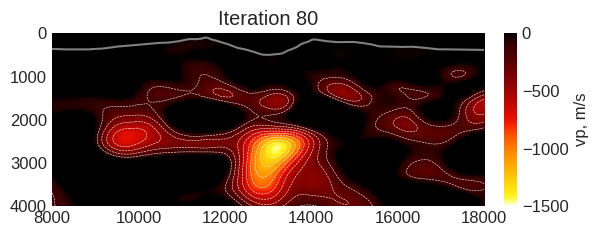

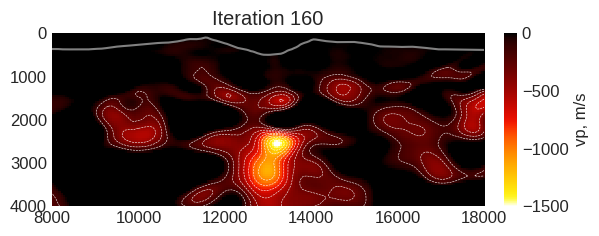

In [40]:
for it in [80, 160]:
    figure()
    plt.title('Iteration %s' % it)
    plot_mod(p14, box_zoom, bt_zoom, ref, it=it)

#### It. 10-130

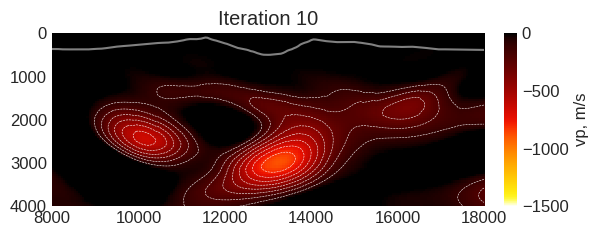

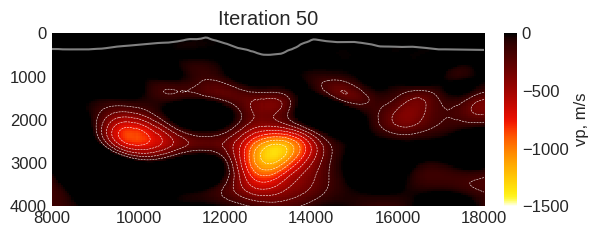

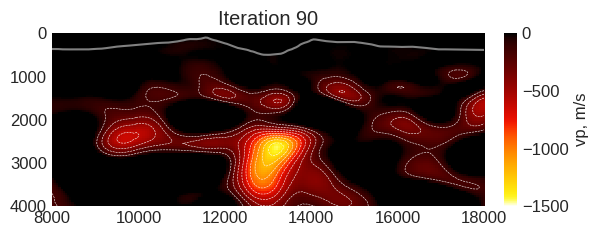

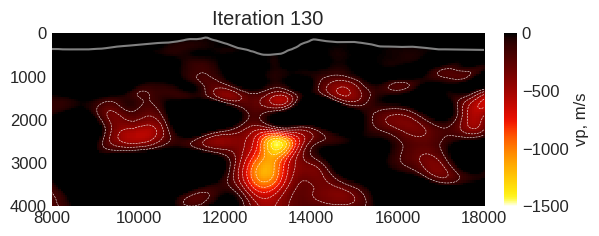

In [18]:
for it in np.arange(10,160,40):
    figure()
    plt.title('Iteration %s' % it)
    plot_mod(it=it)

### Plot three slices

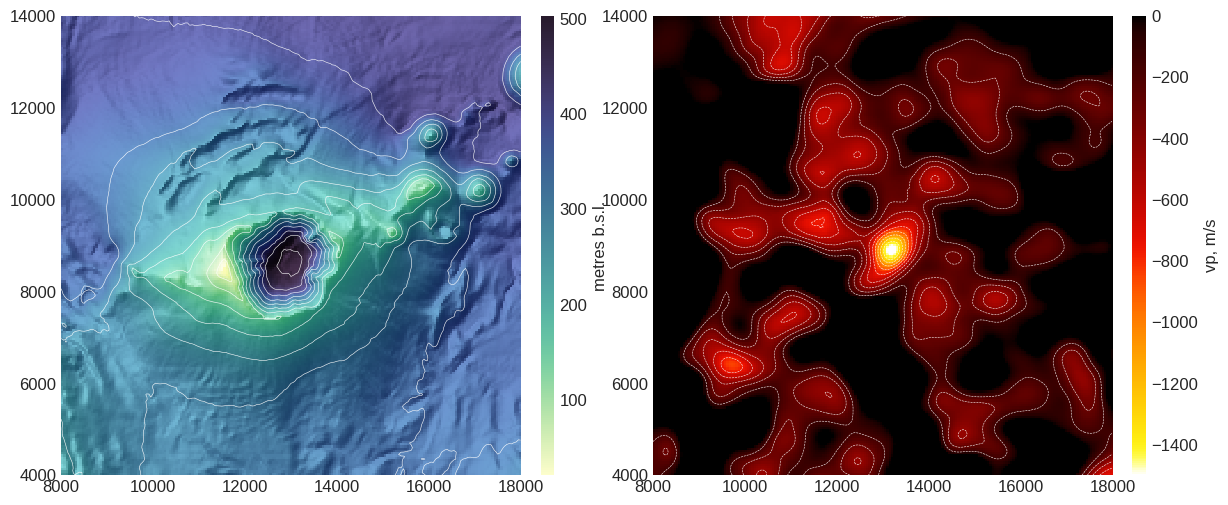

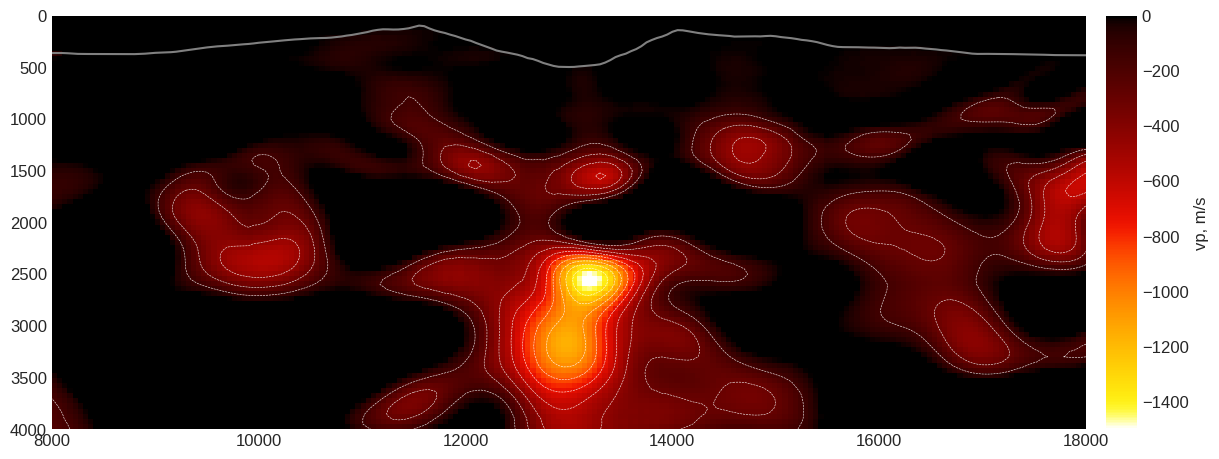

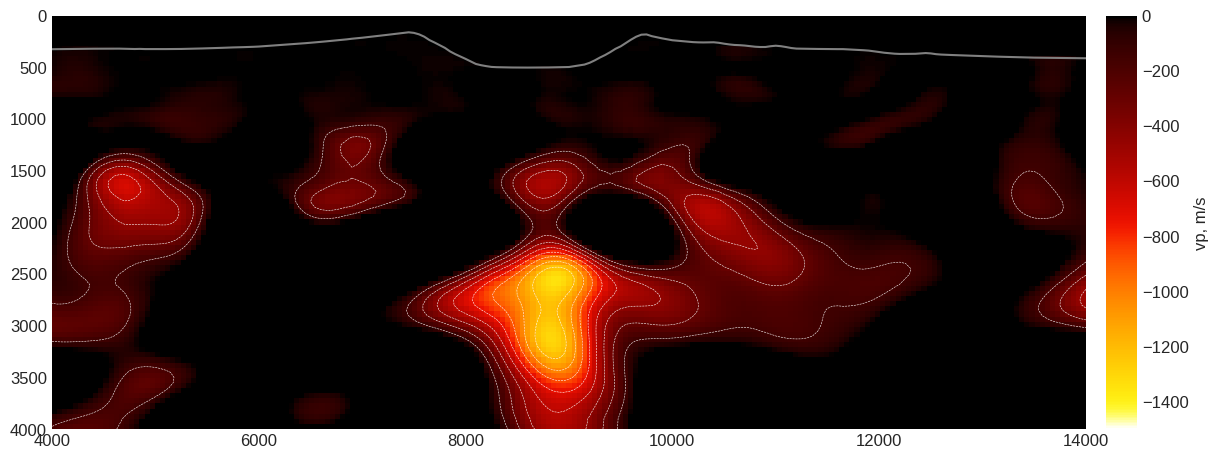

In [64]:
# plot 
it = 160
from matplotlib.gridspec import GridSpec
gs = GridSpec(1,2) #, height_ratios=[1,1]) 
fig = figure(14,14)
ax = fig.add_subplot(gs[0,0])
bt_zoom.plot(mode='shade', cmap='cmo.deep', label='metres b.s.l.')
bt_zoom.plot(mode='cr', colors='w')
ax = fig.add_subplot(gs[0,1])

plot_mod(p14, box_zoom, bt_zoom, ref, it=it, axis=2, value=2.5e3, vmin=-1.5e3)
# ax = fig.add_subplot(gs[1,0])
fig = figure(14,14)
plot_mod(p14, box_zoom, bt_zoom, ref, it=it, axis=1, value=9e3, vmin=-1.5e3)
fig = figure(14,14)
# ax = fig.add_subplot(gs[1,1])
plot_mod(p14, box_zoom, bt_zoom, ref, it=it, axis=0, value=13e3, vmin=-1.5e3)

# Supplement

## Final model old

#### Alg.
Read bathymetry and model(s).

In [18]:
%%time 
from arrau import *
# bathymetry
fname = '../ch03_PROTEUS_exp/data/bathy_x-8e4_8e4_y_-4e4_4e4_res50_3201x1601.mmp'
arr = np.memmap(fname, dtype=np.float32, shape=(3201,1601))
# model
it = 160
a = p14.o.vp.it[it].read()
vp = Arr3d(a, extent=a.extent).extract(box_zoom.extent)

CPU times: user 16 ms, sys: 24 ms, total: 40 ms
Wall time: 2.69 s


#### Fig.
Basic slices of the full inversion domain.

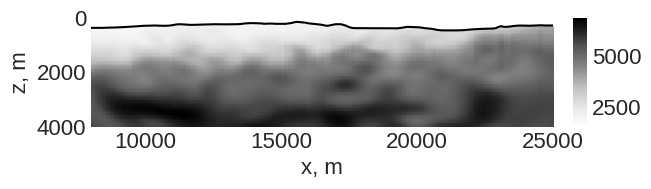

In [18]:
kws = dict(value=1e4, unit='m', axis=1)
vp.slice(**kws).plot()
bt.slice(**kws).plot()
vp.slices.list[0].plot_slice_lines()
plt.gca().invert_yaxis()

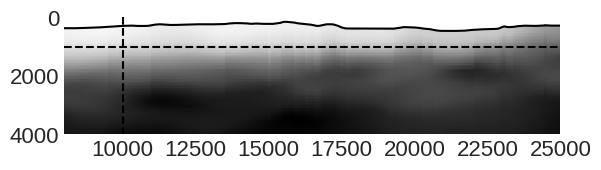

In [30]:
kws = dict(value=1e4, unit='m', axis=1)
vp.slice(**kws).plot()
bt.slice(**kws).plot()
vp.slices.list[0].plot_slice_lines()
plt.gca().invert_yaxis()

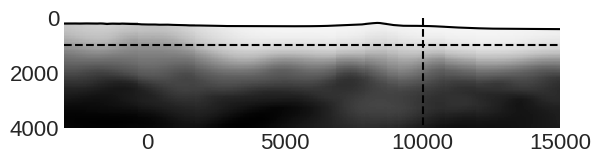

In [29]:
kws = dict(value=1e4, unit='m', axis=0)
vp.slice(**kws).plot()
bt.slice(**kws).plot()
vp.slices.list[1].plot_slice_lines()
plt.gca().invert_yaxis()

In [41]:
vp.slices.list[2].arr.axes[0].extent

array([ 8000., 25000.])

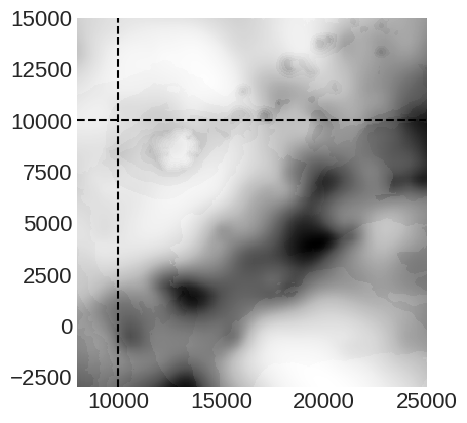

In [31]:
kws = dict(value=1e3, unit='m', axis=2)
vp.slice(**kws).plot()
# bt.slice(**kws).plot()
vp.slices.list[2].plot_slice_lines()
# plt.gca().invert_yaxis()

In [32]:
vp.slices.list

In [41]:
bt_sq.shape

(201, 201)

In [42]:
from fullwavepy.ioapi.memmap import read_mmp, save_mmp
a = bt_sq
x1, x2, y1, y2, z1, z2 = [int(i) for i in [x1, x2, y1, y2, z1, z2]]
a = bt_sq
fname = 'data/bt_x{x1}_{x2}_y{y1}_{y2}_shape{nx}x{ny}.mmp'.format(x1=x1,x2=x2,y1=y1,y2=y2,nx=a.shape[0],ny=a.shape[1])
save_mmp(a.arr, fname)
a = vp_sq
fname = 'data/p14-CP00160-Vp_x{x1}_{x2}_y{y1}_{y2}_z{z1}_{z2}_shape{nx}x{ny}x{nz}.mmp'.format(x1=x1,x2=x2,y1=y1,y2=y2,z1=z1,z2=z2,nx=a.shape[0],ny=a.shape[1],nz=a.shape[2])
save_mmp(a.arr, fname)

In [43]:
fname

'data/p14-CP00160-Vp_x8000_18000_y4000_14000_z0_4000_shape201x201x81.mmp'

In [44]:
a = Arr3d(read_mmp(fname, shape=(201,201,81)), extent=[[x1,x2],[y1,y2],[z1,z2]])

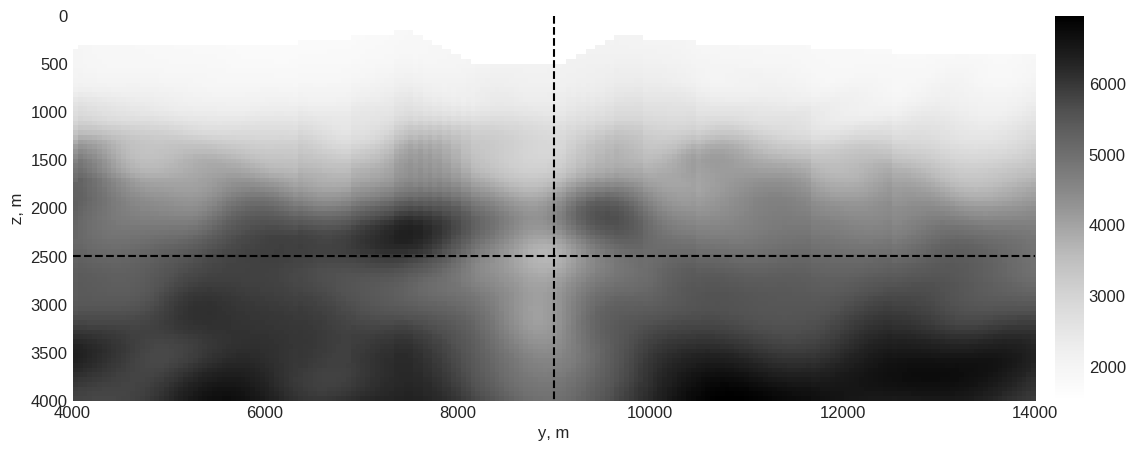

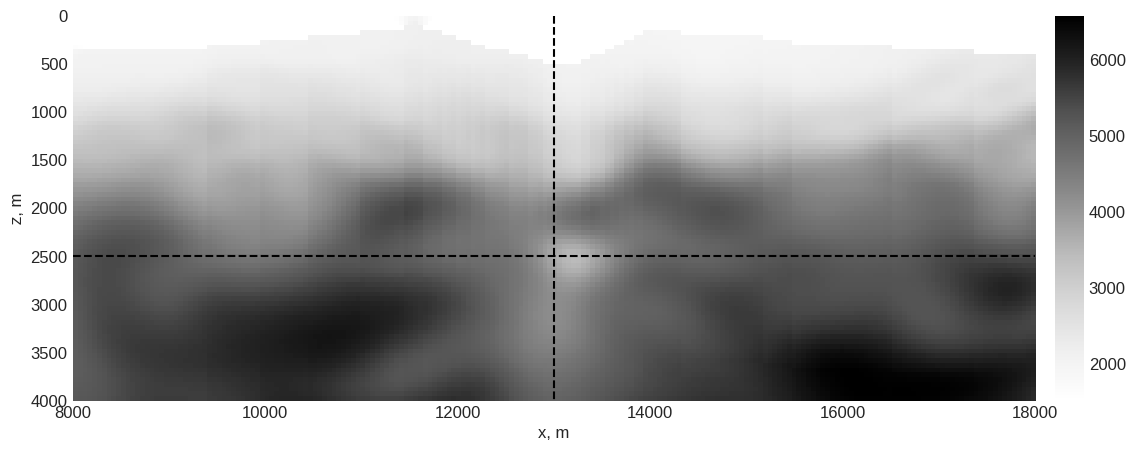

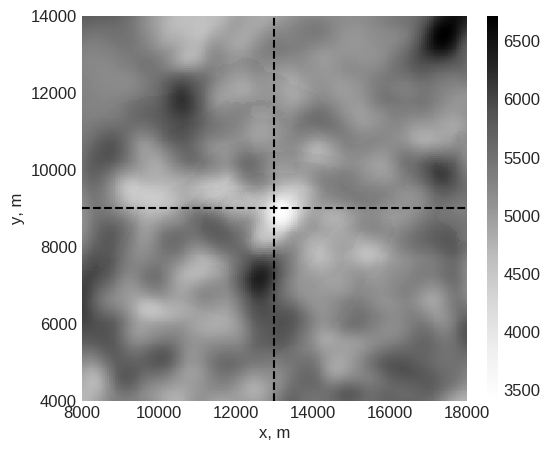

In [45]:
a.plot(13e3, 9e3, 2.5e3)

In [12]:
# bt_sq.save(prefix='bt', ext='mmp', geom_in_fname=True)

#### Fig.
Bathymetry.

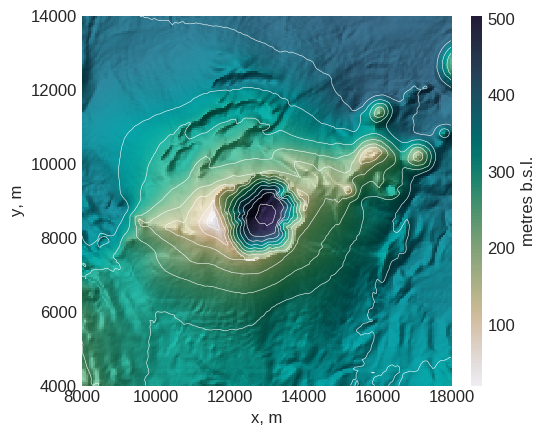

In [9]:
bt_sq.plot(mode='shade', cmap='cmo.rain', label='metres b.s.l.')
bt_sq.plot(mode='cr', colors='w')

#### Fig.
Basic slices.

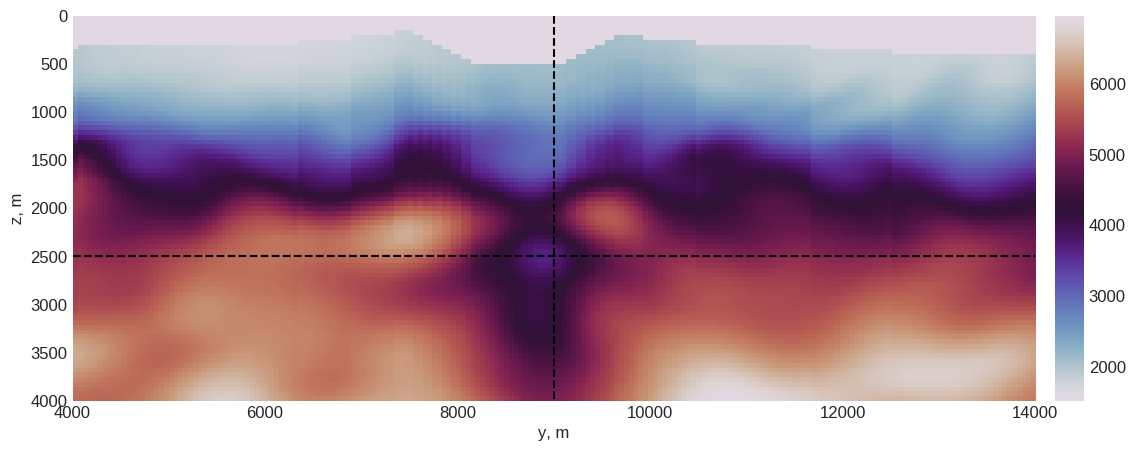

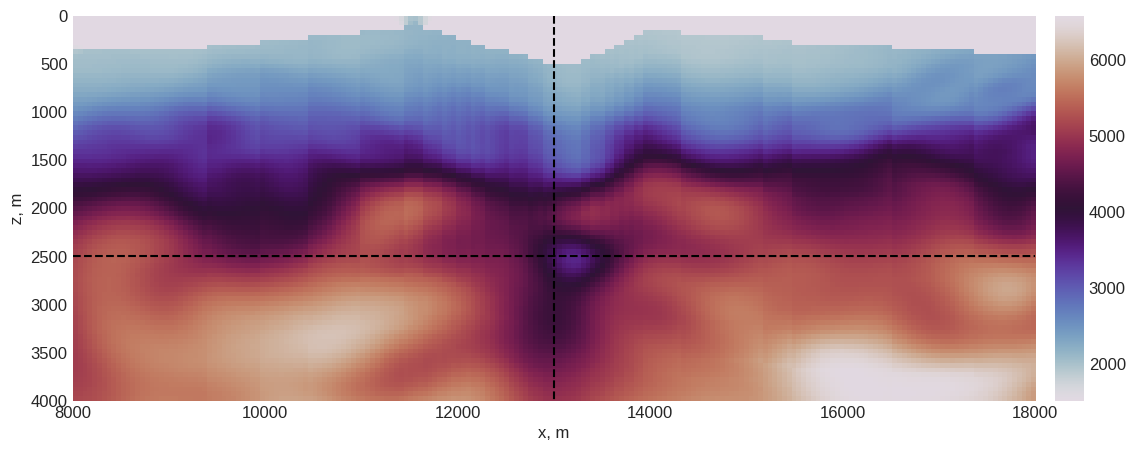

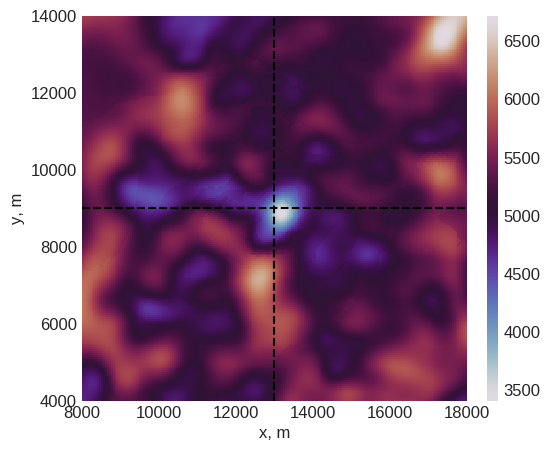

In [16]:
vp_sq.plot(13e3, 9e3, 2.5e3, cmap='twilight')

#### Fig.
Land area is larger than in starting model...

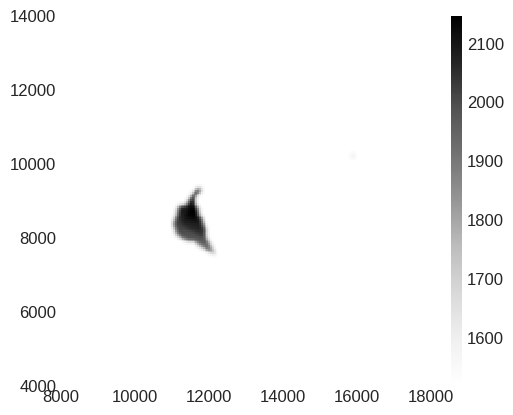

In [23]:
vp.slice(0, axis=2).plot()

## Plots used in thesis

#### Fig. 
Slices through the low-velocity volume.

In [10]:
p14.o.vp.it[90]

#### Fig. 
Low-velocity volume.

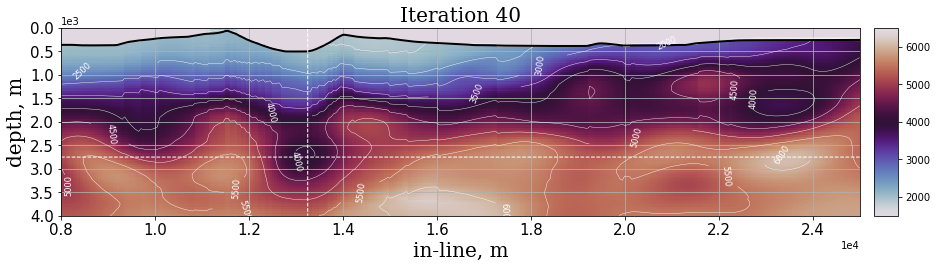

In [504]:
%%time 
figure(15,5)
plot_kol(p14.o.vp, 40, 'y', absolute=1) # see ad-hoc plotters
plt.savefig('test.png')

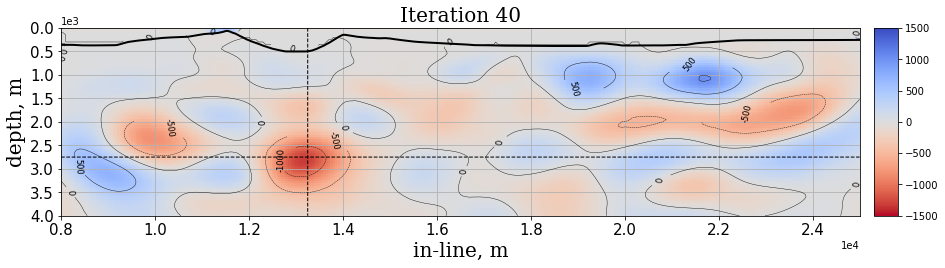

In [505]:
%%time 
figure(15,5)
plot_kol(p14.o.vp, 40, 'y', p14.o.vp.it[0], absolute=1)
plt.savefig('test.png')

#### Fig.
0 vs. 87 iteration.

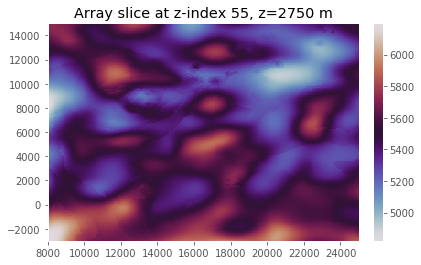

In [41]:
A3d(p14.o.vp.it[0].read()).plot(2750, unit='m', axis='z', cmap='twilight')

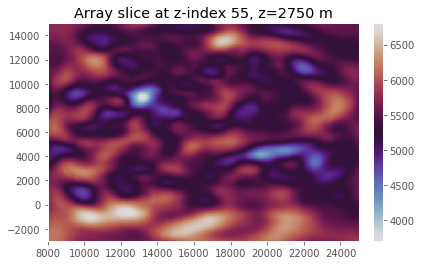

In [40]:
A3d(p14.o.vp.it[87].read()).plot(2750, unit='m', axis='z', cmap='twilight')

#### Fig.
it 88-160. Anomaly got a bit smaller in size and slicing is no longer accurate.

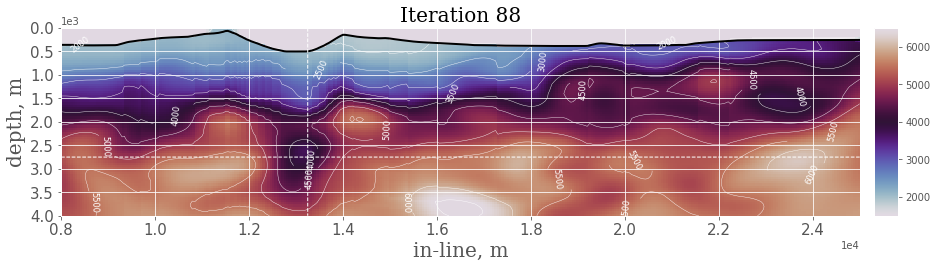

In [23]:
figure(15,5)
plot_kol(p14.o.vp, 88, 'y', absolute=1) # see ad-hoc plotters

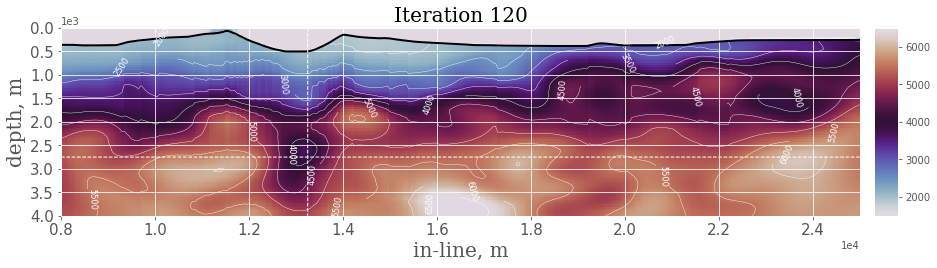

In [24]:
figure(15,5)
plot_kol(p14.o.vp, 120, 'y', absolute=1) # see ad-hoc plotters

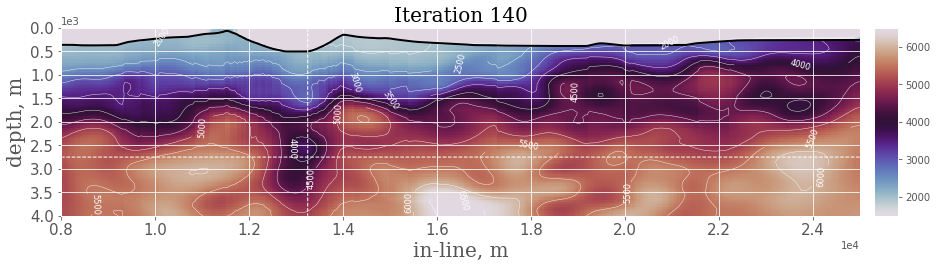

In [25]:
figure(15,5)
plot_kol(p14.o.vp, 140, 'y', absolute=1) # see ad-hoc plotters

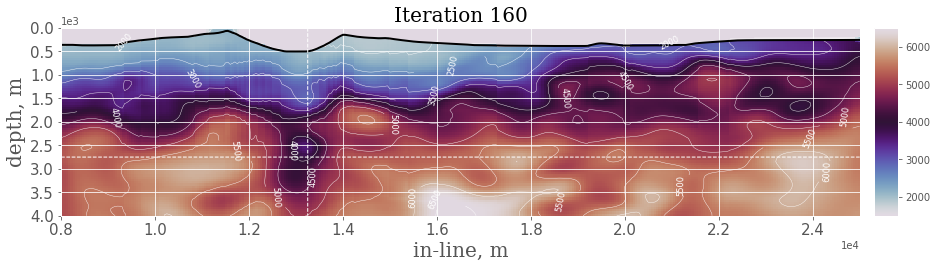

In [26]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'y', absolute=1) # see ad-hoc plotters

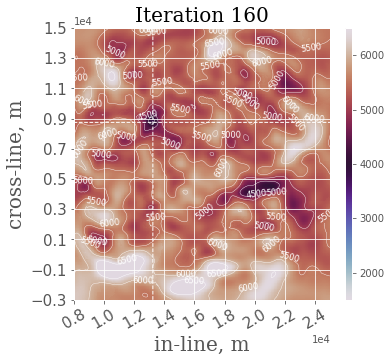

In [71]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'z', absolute=1) # see ad-hoc plotters

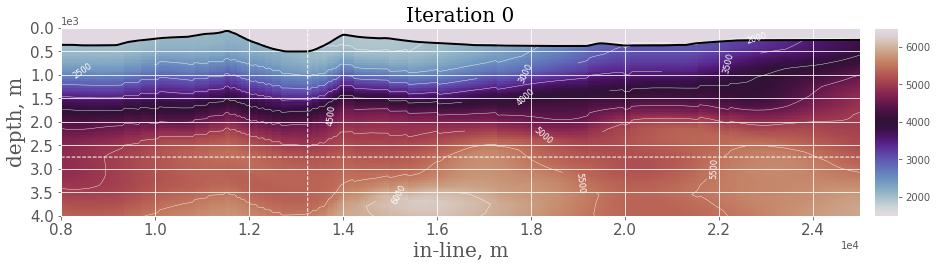

In [84]:
figure(15,5)
plot_kol(p14.o.vp, 0, 'y', absolute=1) # see ad-hoc plotters
plt.savefig('../../figures/ch_kol/kol_svp_yslice.png')

#### Fig.
Anomalies

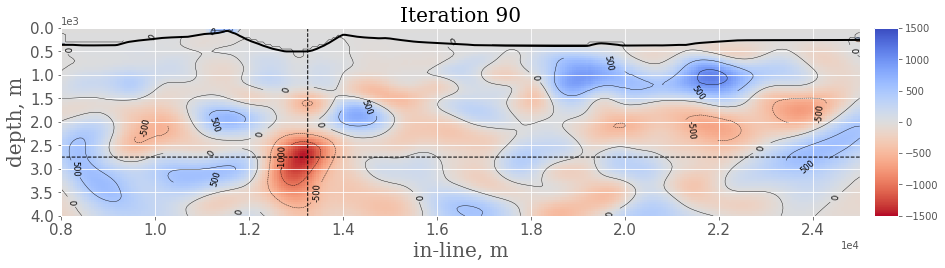

In [36]:
lll(40)
figure(15,5)
plot_kol(p14.o.vp, 90, 'y', p14.o.vp.it[0], absolute=1)

In [82]:
!ls ../..

apt.txt		 figures    README.md	      software
environment.yml  notebooks  requirements.txt  start


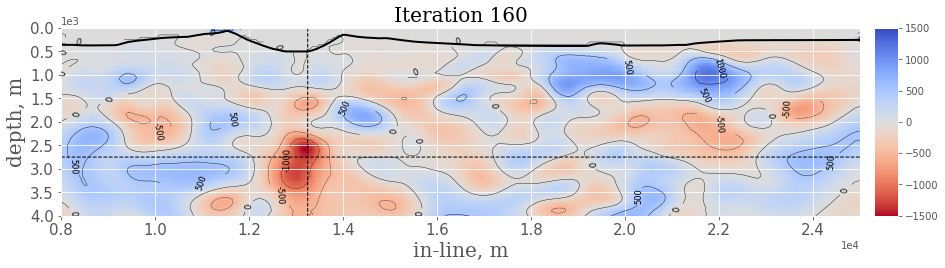

In [83]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'y', p14.o.vp.it[0], absolute=1)
plt.savefig('../../figures/ch_kol/kol_vp_it_160_anom_abs.png')

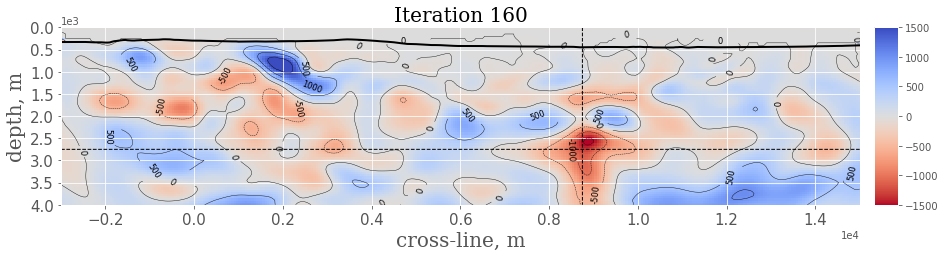

In [41]:
figure(15,5)
plot_kol(p14.o.vp, 160, 'x', p14.o.vp.it[0], absolute=1)

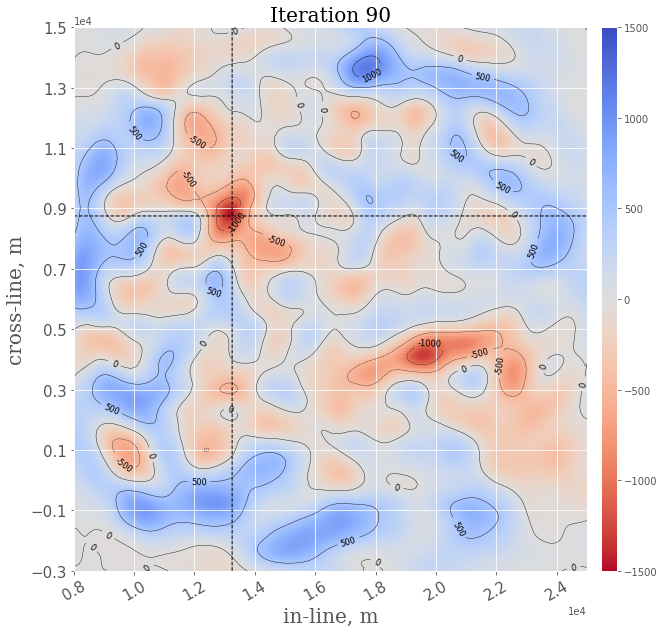

In [86]:
figure(10,10)
plot_kol(p14.o.vp, 90, 'z', p14.o.vp.it[0], absolute=1)

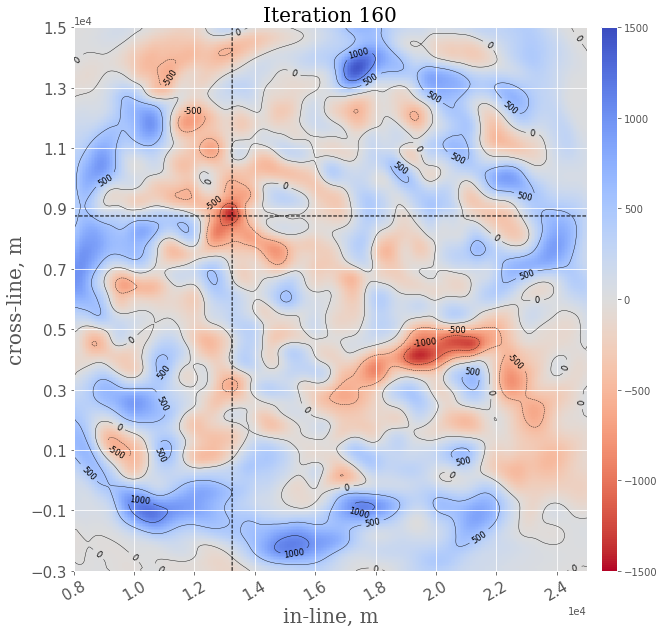

In [87]:
figure(10,10)
plot_kol(p14.o.vp, 160, 'z', p14.o.vp.it[0], absolute=1)

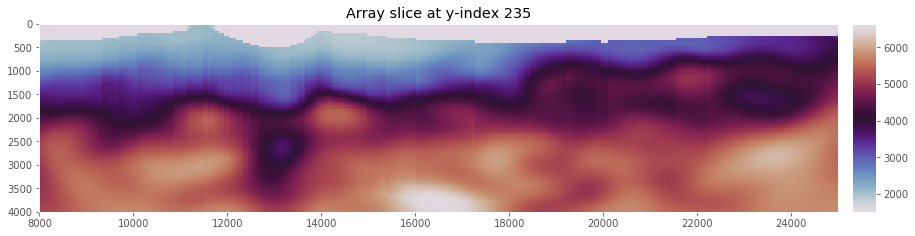

In [60]:
figure(15,5)
p14.o.vp.it[90].plot(node=235, aspect='equal')

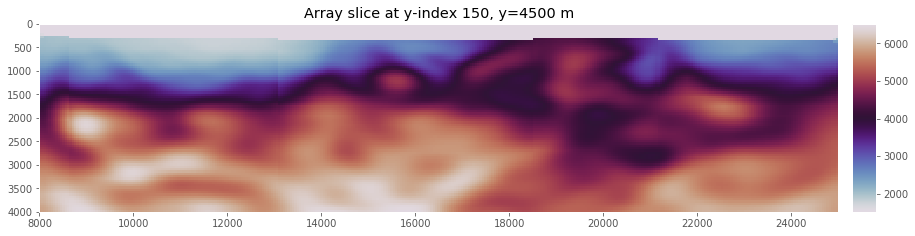

In [65]:
figure(15,5)
A3d(p14.o.vp.it[160].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

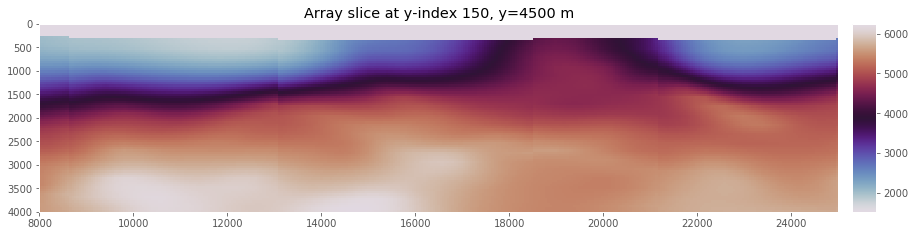

In [66]:
figure(15,5)
A3d(p14.o.vp.it[0].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

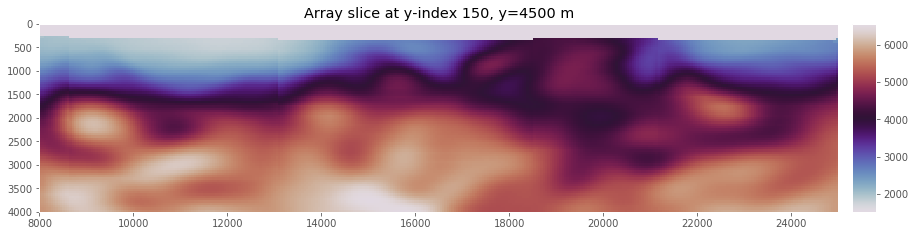

In [67]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(4500, unit='m', aspect='equal', cmap='twilight')

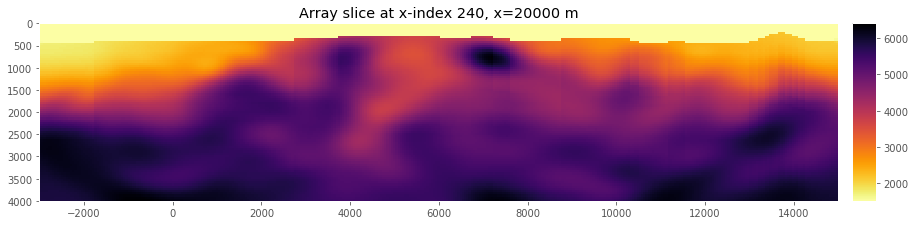

In [75]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='inferno_r')

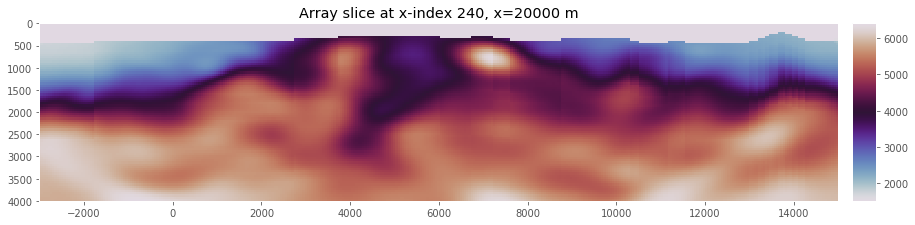

In [69]:
figure(15,5)
A3d(p14.o.vp.it[90].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='twilight')

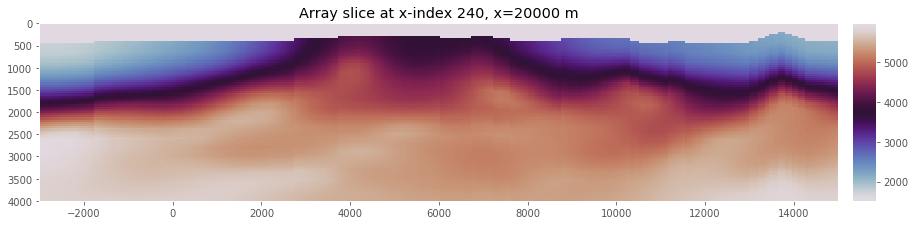

In [70]:
figure(15,5)
A3d(p14.o.vp.it[0].read()).plot(20000, unit='m', axis='x', aspect='equal', cmap='twilight')

#### Alg.  
Save all like above.

In [541]:
for p in [p14]:
    for it in [0]:
        for absolute in [1,0]:
            for bgd in [None, p.i.svp]:
                if bgd is None and (not absolute):
                    continue 
                for at in ['x', 'y', 'z']:
                    if at == 'z':
                        figure(10,10)
                    else:
                        figure(18,8)
                    plot_kol(p.o.vp, it, at=at, bgd=bgd, absolute=absolute)
                    if bgd is None:
                        bid = 'NA'
                    elif bgd == p.i.svp:
                        bid = 'svp'
                    else:
                        raise ValueError('bgd')
                    name = '{p}_it{it}_at-{at}_bgd-{bgd}_abs-{abs}'.format(p=p.name, it=it, bgd=bid, at=at, abs=absolute)
                    fname = 'fig/%s' % name  
                    plt.savefig(fname)
                    plt.close()

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


#### Alg.  
Save all like above.

In [562]:
freq = 3
sids = [i.ID for i in p14.i.s.read().li]
for sid in sids:
    for it in [1] + list(np.arange(20,81,20)):
        print(sid,it)
        dc = p14.out.dc.it[it][sid]
        dc.plot_phase(freq=freq)
        name = '%s_freq%s.png' % (dc.name[:-4], freq)
        fname = 'fig/%s' % name
        plt.savefig(fname)
        plt.close()

4104 1
4104 20
4104 40
4104 60
4104 80
4105 1
4105 20
4105 40
4105 60
4105 80
4109 1
4109 20
4109 40
4109 60
4109 80
4110 1
4110 20
4110 40
4110 60
4110 80
4112 1
4112 20
4112 40
4112 60
4112 80
4123 1
4123 20
4123 40
4123 60
4123 80
4124 1
4124 20
4124 40
4124 60
4124 80
4125 1
4125 20
4125 40
4125 60
4125 80
4137 1
4137 20
4137 40
4137 60
4137 80
4138 1
4138 20
4138 40
4138 60
4138 80
4139 1
4139 20
4139 40
4139 60
4139 80
4157 1
4157 20
4157 40
4157 60
4157 80
4158 1
4158 20
4158 40
4158 60
4158 80
4176 1
4176 20
4176 40
4176 60
4176 80
4177 1
4177 20
4177 40
4177 60
4177 80
4178 1
4178 20
4178 40
4178 60
4178 80


# ...